In [ ]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_squared_error, mean_absolute_percentage_error, r2_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)

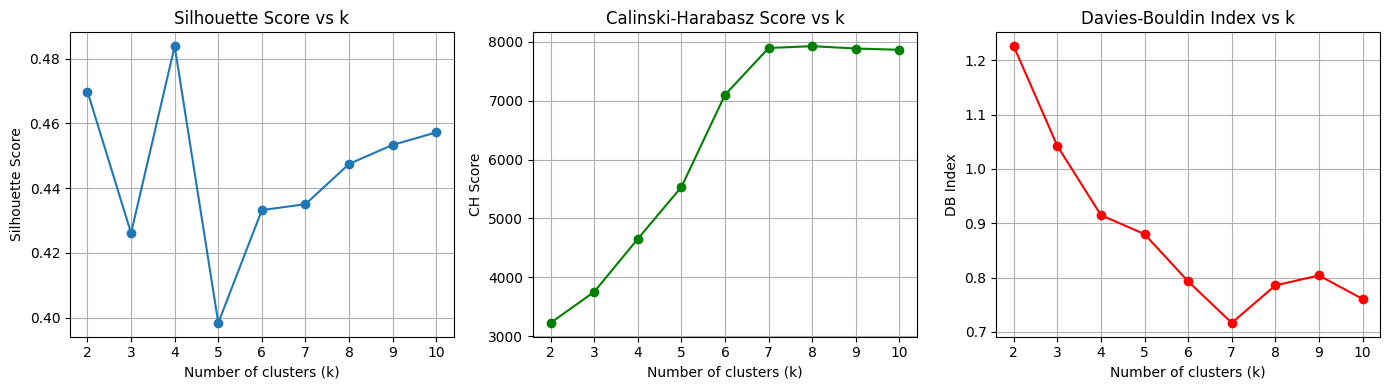

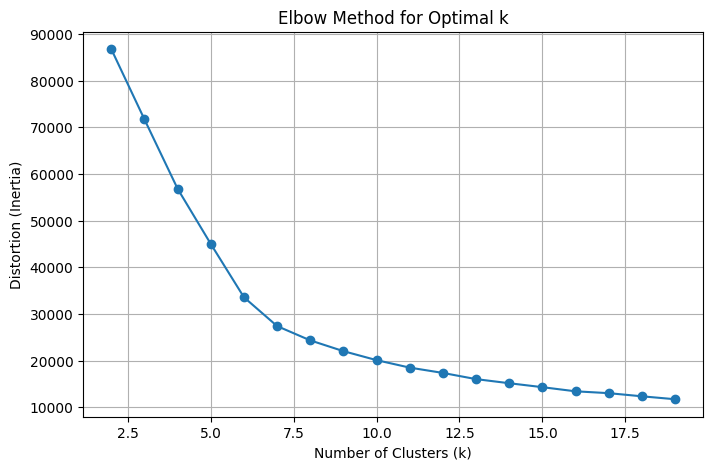

In [8]:
# Load dataset
df = pd.read_csv('listings.csv')

# Select relevant columns
features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
target = 'price'

# Clean and prepare data
df_clean = df[features + [target]].dropna(subset=[target])
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df_clean[features])
y = df_clean[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# A1 - Linear Regression with 1 feature
model_1 = LinearRegression().fit(X_train_scaled[:, [0]], y_train)
y_train_pred_1 = model_1.predict(X_train_scaled[:, [0]])
y_test_pred_1 = model_1.predict(X_test_scaled[:, [0]])

# A2 - Metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

train_metrics_1 = regression_metrics(y_train, y_train_pred_1)
test_metrics_1 = regression_metrics(y_test, y_test_pred_1)

# A3 - Regression with all features
model_all = LinearRegression().fit(X_train_scaled, y_train)
y_train_pred_all = model_all.predict(X_train_scaled)
y_test_pred_all = model_all.predict(X_test_scaled)
train_metrics_all = regression_metrics(y_train, y_train_pred_all)
test_metrics_all = regression_metrics(y_test, y_test_pred_all)

# A4 - KMeans with k=2
kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_train_scaled)
labels2 = kmeans2.labels_

# A5 - Clustering Metrics
silhouette = silhouette_score(X_train_scaled, labels2)
calinski = calinski_harabasz_score(X_train_scaled, labels2)
davies = davies_bouldin_score(X_train_scaled, labels2)

import matplotlib.pyplot as plt

# A6 - Plot Clustering Scores
plt.figure(figsize=(14, 4))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_vals, sil_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Calinski-Harabasz Score
plt.subplot(1, 3, 2)
plt.plot(k_vals, cal_scores, marker='o', color='green')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('CH Score')
plt.grid(True)

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_vals, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('DB Index')
plt.grid(True)

plt.tight_layout()
plt.show()

# A7 - Elbow Plot
distortions = []
for k in range(2, 20):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_train_scaled)
    distortions.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()

In [ ]:
# --- A1 & A2: Linear Regression with 1 feature (minimum_nights)
print("A1 & A2: Linear Regression with 1 Feature (minimum_nights)")
print("Train Metrics (MSE, RMSE, MAPE, R2):", train_metrics_1)
print("Test Metrics (MSE, RMSE, MAPE, R2):", test_metrics_1)
print("-" * 50)

# --- A3: Linear Regression with all features
print("A3: Linear Regression with All Features")
print("Train Metrics (MSE, RMSE, MAPE, R2):", train_metrics_all)
print("Test Metrics (MSE, RMSE, MAPE, R2):", test_metrics_all)
print("-" * 50)

# --- A4 & A5: KMeans Clustering with k=2
print("A4 & A5: KMeans Clustering (k=2)")
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski)
print("Davies-Bouldin Index:", davies)
print("-" * 50)

# --- A6: Clustering Scores for Different k
print("A6: Clustering Evaluation for k=2 to 10")
for idx, k in enumerate(k_vals):
    print(f"k={k} → Silhouette={sil_scores[idx]:.3f}, CH={cal_scores[idx]:.2f}, DB={db_scores[idx]:.2f}")
print("-" * 50)

# --- A7: Elbow Plot already displayed above
print("A7: Elbow Plot displayed. Observe the 'elbow' point for optimal k.")


A1 & A2: Linear Regression with 1 Feature (minimum_nights)
Train Metrics (MSE, RMSE, MAPE, R2): (12210294.471109768, np.float64(3494.323177828543), 3.5477117790648833, 0.004503755597630721)
Test Metrics (MSE, RMSE, MAPE, R2): (12159978.872212088, np.float64(3487.1161254268673), 3.3873792547704755, 0.005981530060408469)
--------------------------------------------------
A3: Linear Regression with All Features
Train Metrics (MSE, RMSE, MAPE, R2): (12136081.404253906, np.float64(3483.687902819928), 3.642380633562596, 0.010554291849265929)
Test Metrics (MSE, RMSE, MAPE, R2): (12079820.475320341, np.float64(3475.603613089436), 3.460458770554219, 0.0125340847867349)
--------------------------------------------------
A4 & A5: KMeans Clustering (k=2)
Silhouette Score: 0.46984323839474135
Calinski-Harabasz Score: 3227.0037795142307
Davies-Bouldin Index: 1.2259171603303793
--------------------------------------------------
A6: Clustering Evaluation for k=2 to 10
k=2 → Silhouette=0.470, CH=3227.0